# Blind injection study 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# read data
data = pd.read_csv("data.txt", sep = ",")
data.columns = data.columns.str.strip()

In [3]:
data.head()

,x,y1,y2,y3
0,-10.00000,-27.835948,-1.204022,32.752084
1,-9.97998,-29.139783,-2.574528,31.335606
2,-9.95996,-28.501142,-2.001794,31.858014
3,-9.93994,-27.178927,-0.744721,33.060393
4,-9.91992,-27.492202,-1.122373,32.623676


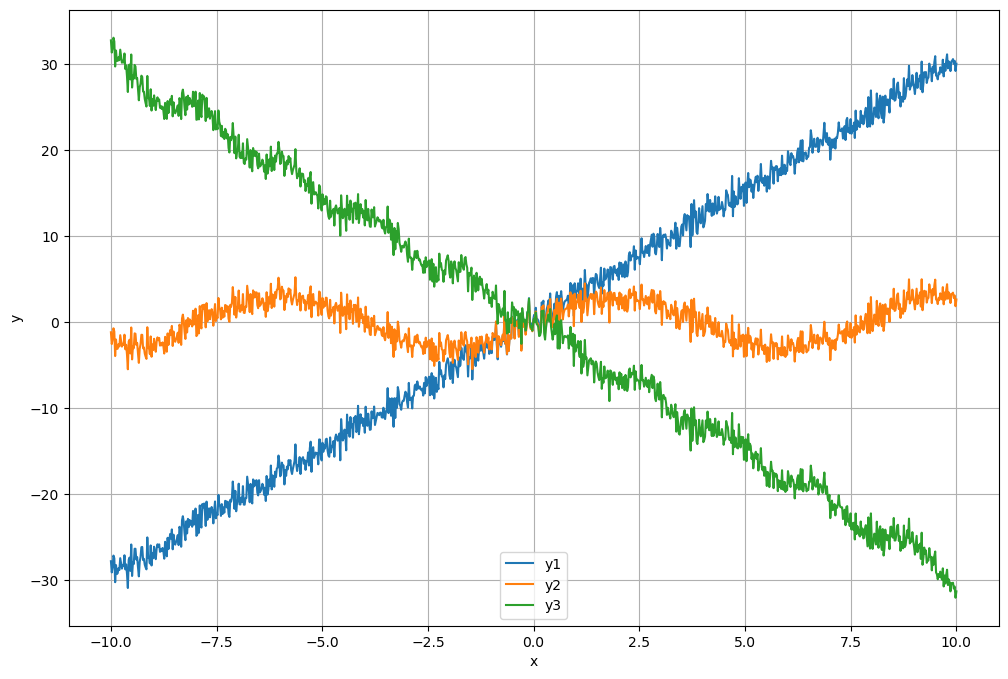

In [4]:
# plot data
plt.figure(figsize=(12, 8))
plt.plot(data['x'], data['y1'], label='y1')
plt.plot(data['x'], data['y2'], label='y2')
plt.plot(data['x'], data['y3'], label='y3')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

The statistical model is y ~ $N(f(x,\beta ),1)$ that each y is normally distributed with the mean of $f(x,\beta )$ and variance of 1. i.e., For i=,...,n,  $y_i  =f(x_i,\beta ) + e_i , e_i$ ~ N(0,1) 


## y1

It can be seen from the image of y1 that y1 has both a linear growth trend and an oscillation trend.
So we can first assume that the model of y1 is $y_1 = \beta_0 + \beta_1*x + \beta_2 sin(\omega *x) + e$

$\beta_0$ - intercept

$\beta_1$ - slope

$\beta_2$ - amplitude

$\omega$ - oscillation frequency

$e$ - Errors, $e$ ~ N(0,1)

In [87]:
def model(x, beta0, beta1, beta2, omega):
    return beta0 + beta1 * x + beta2 * np.sin(omega * x)


In [88]:
def log_likelihood(y_obs, y_pred, sigma=1):
    return -0.5 * np.sum(((y_obs - y_pred) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))


In [89]:
def prior(beta0, beta1, beta2, omega):
    if 0 < omega < 20 and -10 < beta0 < 10 and -10 < beta1 < 10 and -10 < beta2 < 10:
        return 1
    else:
        return 0


In [94]:
def metropolis_hastings(y, x, iterations, initial_params, step_size):
    beta0, beta1, beta2, omega = initial_params
    current_log_prob = log_likelihood(y, model(x, beta0, beta1, beta2, omega)) + np.log(prior(beta0, beta1, beta2, omega))
    
    accepted = []
    for i in range(iterations):
        beta0_prop, beta1_prop, beta2_prop, omega_prop = np.array([beta0, beta1, beta2, omega]) + step_size * np.random.randn(4)
        prop_log_prob = log_likelihood(y, model(x, beta0_prop, beta1_prop, beta2_prop, omega_prop)) + np.log(prior(beta0_prop, beta1_prop, beta2_prop, omega_prop))
        
        
        if np.exp(prop_log_prob - current_log_prob) > np.random.uniform(0, 1):
            beta0, beta1, beta2, omega = beta0_prop, beta1_prop, beta2_prop, omega_prop
            current_log_prob = prop_log_prob
            accepted.append([beta0, beta1, beta2, omega])
    
    return np.array(accepted)


In [95]:
#
initial_params = [0, 3, 1, 10]  
iterations = 10000  #
step_size = 0.01  

accepted = metropolis_hastings(data['y1'], data['x'], iterations, initial_params, step_size)




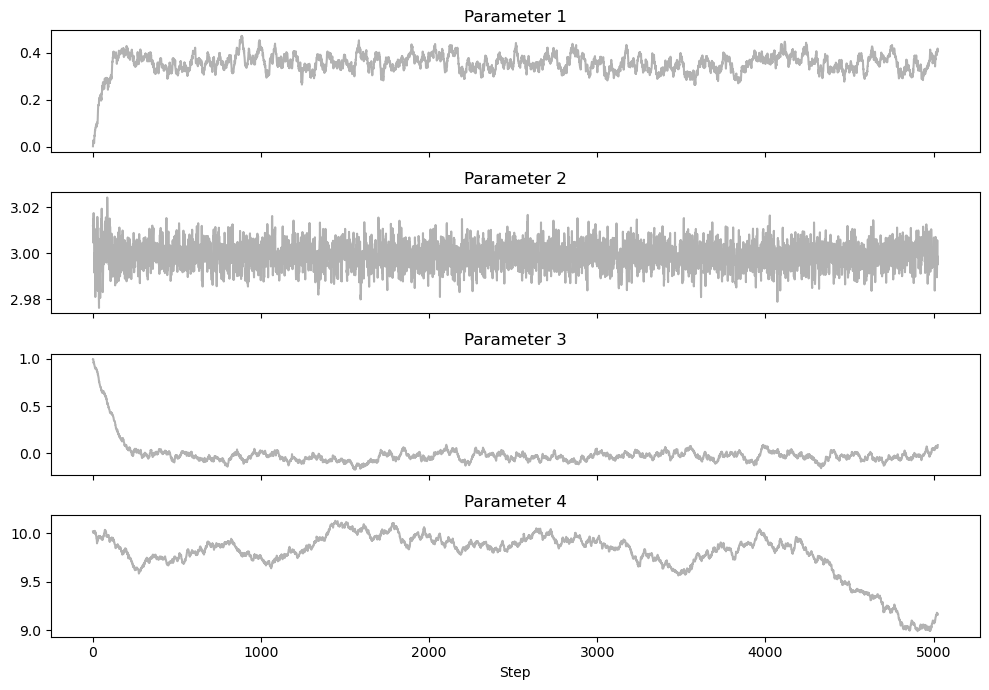

In [96]:
n_params = accepted.shape[1]

fig, axes = plt.subplots(n_params, figsize=(10, 7), sharex=True)
for i in range(n_params):
    axes[i].plot(accepted[:, i], "k", alpha=0.3)
    axes[i].set_title(f'Parameter {i+1}')
axes[n_params-1].set_xlabel("Step")
plt.tight_layout()
plt.show()

In [93]:
n_params

4

In [34]:
np.random.randn(5)

array([-0.65345956,  0.34830996, -0.02870591,  2.00470273, -1.23657159])

In [44]:
np.random.normal(0,0.1)

-0.03462813318802115